In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [250]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

### Датасет: Online Gaming Anxiety Data

(первоначальный источник - https://osf.io/vnbxk/)

Датасет сопоставляет оценки по шкалам SWL(удовлетворенность жизнью), GAD(Генерализованное тревожное расстройство), SPIN(Социальное тревожное расстройство/"Социофобия"), полученные в результате опросника, с социально-экономическими факторами и привычками игроков в онлайн игры


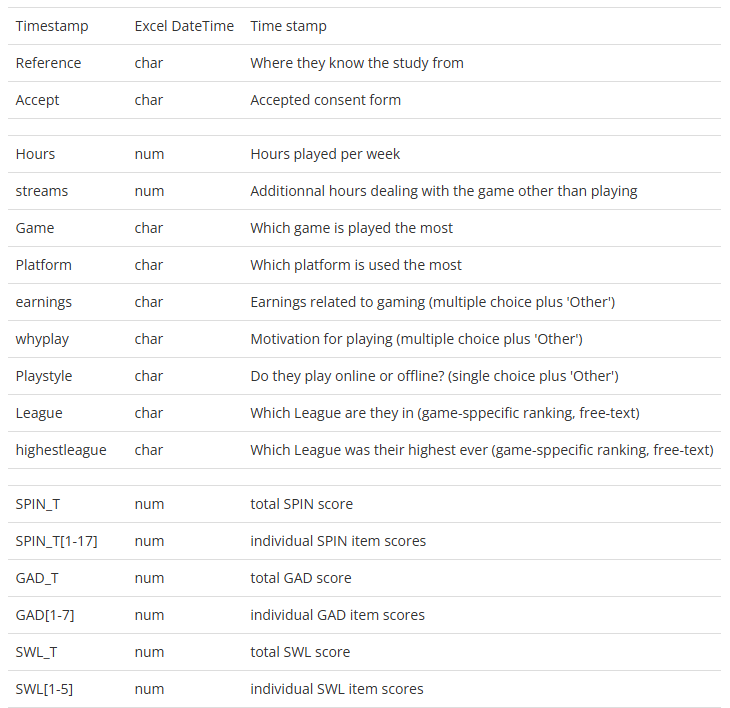


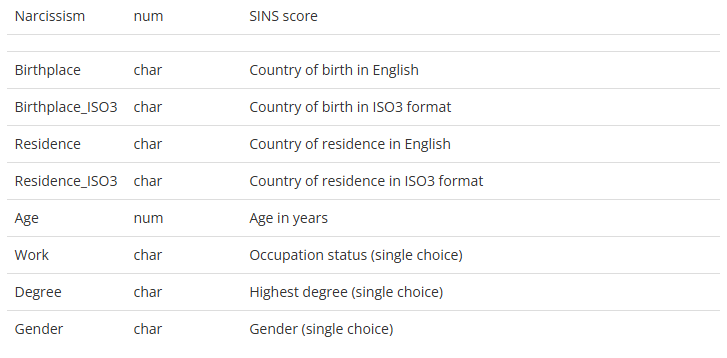

## 1. Ознакомление с датасетом

In [273]:
# считаем датасет из файла
file = '/kaggle/input/online-gaming-anxiety-data/GamingStudy_data.csv'
df = pd.read_csv(file, encoding = 'ISO-8859-1')

In [274]:
# выведем первые 5 строк
df.head(5)

,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,SWL3,SWL4,SWL5,Game,Platform,Hours,earnings,whyplay,League,highestleague,streams,SPIN1,SPIN2,SPIN3,SPIN4,SPIN5,SPIN6,SPIN7,SPIN8,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Gender,Age,Work,Degree,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,3,5,5,5,5,Skyrim,"Console (PS, Xbox, ...)",15.0,I play for fun,having fun,NaN,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,Male,25,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,3,5,2,5,1,Other,PC,8.0,I play for fun,having fun,NaN,NaN,2.0,2.0,1.0,1.0,3.0,2.0,3.0,1.0,3.0,4.0,0.0,3.0,0.0,1.0,3.0,3.0,1.0,2.0,1.0,Male,41,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,2,6,5,2,2,Other,PC,0.0,I play for fun,having fun,NaN,NaN,0.0,1.0,0.0,1.0,2.0,3.0,4.0,2.0,1.0,0.0,1.0,1.0,3.0,0.0,2.0,4.0,4.0,2.0,4.0,Female,32,Employed,Bachelor (or equivalent),Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,2,5,5,3,2,Other,PC,20.0,I play for fun,improving,NaN,NaN,5.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,2.0,Male,28,Employed,Bachelor (or equivalent),USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,5,42052.08948,2,1,2,2,2,3,2,Very difficult,2,2,4,5,1,Other,"Console (PS, Xbox, ...)",20.0,I play for fun,having fun,NaN,NaN,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,Male,19,Employed,High school diploma (or equivalent),USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA


In [275]:
# посмотрим размер
df.shape

(13464, 55)

In [276]:
# общая информация 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S. No.           13464 non-null  int64  
 1   Timestamp        13464 non-null  float64
 2   GAD1             13464 non-null  int64  
 3   GAD2             13464 non-null  int64  
 4   GAD3             13464 non-null  int64  
 5   GAD4             13464 non-null  int64  
 6   GAD5             13464 non-null  int64  
 7   GAD6             13464 non-null  int64  
 8   GAD7             13464 non-null  int64  
 9   GADE             12815 non-null  object 
 10  SWL1             13464 non-null  int64  
 11  SWL2             13464 non-null  int64  
 12  SWL3             13464 non-null  int64  
 13  SWL4             13464 non-null  int64  
 14  SWL5             13464 non-null  int64  
 15  Game             13464 non-null  object 
 16  Platform         13464 non-null  object 
 17  Hours       

## 2. Предобработка данных

In [277]:
# отбрасываем прям совсем ненужные столбцы
columns_to_drop=[
    'Residence_ISO3',  # дублирует признак Residence 
    'Birthplace_ISO3', # дублирует признак Birthplace
    'accept',          # согласие на обработку данных...
    'highestleague',   # все значения null 
    'Reference',       # откуда респондент узнал про опрос
    'Timestamp',       # время
    'S. No.',           # порядковый номер респондента
    'League'            # лиги в каждой игре отличаются, так что особого смысла не несет + много пропущенных
]
df.drop(columns_to_drop, axis=1, inplace=True)

In [278]:
# посмотрим на количество пропусков в столбцах
df.isnull().sum()

GAD1             0
GAD2             0
GAD3             0
GAD4             0
GAD5             0
GAD6             0
GAD7             0
GADE           649
SWL1             0
SWL2             0
SWL3             0
SWL4             0
SWL5             0
Game             0
Platform         0
Hours           30
earnings         0
whyplay          0
streams        100
SPIN1          124
SPIN2          154
SPIN3          140
SPIN4          159
SPIN5          166
SPIN6          156
SPIN7          138
SPIN8          144
SPIN9          158
SPIN10         160
SPIN11         187
SPIN12         168
SPIN13         187
SPIN14         156
SPIN15         147
SPIN16         147
SPIN17         175
Narcissism      23
Gender           0
Age              0
Work            38
Degree        1577
Birthplace       0
Residence        0
Playstyle        0
GAD_T            0
SWL_T            0
SPIN_T         650
dtype: int64

Примечание: переменные GAD_T, SWL_T, SPIN_T - это просто суммы ответов на вопросы GAD 1-7, SWL 1-5 и SPIN 1-17 соответственно. 

In [279]:
# отбросим те наблюдения, где пропущены вообще *все* 17 ответов на SPIN
cols_to_check = [ f'SPIN{i}' for i in range(1, 18) ]

df.dropna(subset=cols_to_check, how='all', axis=0, inplace=True)

In [280]:
# заменяем пропуски на моду (категориальные + с дискретными величинами)
cols = cols_to_check + ['Narcissism', 'Degree', 'Work', 'GADE']  # колонки, которые будут заполнены 

for col in cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [281]:
# а числовые - на среднее значение
cols = ['streams', 'Hours']
for col in cols:
    df[col] = df[col].fillna(df[col].mean())

In [282]:
# теперь можно заполнить оставшиеся пропуски SPIN_T, посчитав суммы SPIN(1 - 17)
df['SPIN_T'] = df['SPIN_T'].fillna(df[cols_to_check].sum(axis=1))

In [283]:
# есть ли дубликаты
df.duplicated().sum()

50

In [284]:
# удаляем дубликаты
df.drop_duplicates(inplace=True)

In [285]:
# функция для чистки текста
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df

In [286]:
df = standardize_text(df, 'Playstyle')

In [287]:
# в колонке Playstyle можно было выбрать только 1 вариант ответа, 
# и ответов в свободной форме мало 
# поэтому можно просто оставить самые популярные варианты ответа

most_popular = df['Playstyle'].value_counts()[:9].index
most_popular

Index(['multiplayer - online - with real life friends',
       'multiplayer - online - with strangers',
       'multiplayer - online - with online acquaintances or teammates',
       'singleplayer', 'multiplayer - offline (people in the same room)',
       'all of the above',
       'multiplayer - online - with real life friends and online acquaintances',
       'multiplayer online with friends and strangers',
       'multiplayer with friends and strangers'],
      dtype='object', name='Playstyle')

In [288]:
# а остальные заменить на моду
df.loc[~df['Playstyle'].isin(most_popular), 'Playstyle'] = most_popular[0]

In [290]:
# c колонкой earnings поступим аналогично

df = standardize_text(df, 'earnings')

In [291]:
most_popular = df['earnings'].value_counts()[:5].index
most_popular

Index(['i play for fun',
       'i play mostly for fun but earn a little on the side (tournament winnings, streaming, etc)',
       'i earn a living by playing this game', 'i play to win',
       'i play to get better'],
      dtype='object', name='earnings')

In [292]:
df.loc[~df['earnings'].isin(most_popular), 'earnings'] = most_popular[0]

In [305]:
# и с whyplay тоже
df = standardize_text(df, 'whyplay')
most_popular = df['whyplay'].value_counts()[:8].index
most_popular

Index(['having fun', 'improving', 'winning', 'relaxing', 'all of the above',
       'improving and having fun', 'winning and improving',
       'having fun and improving'],
      dtype='object', name='whyplay')

In [307]:
df.loc[~df['whyplay'].isin(most_popular), 'whyplay'] = most_popular[0]

In [309]:
# Преобразуем категориальные значения в числовые с помощью LabelEncoder

from sklearn.preprocessing import LabelEncoder

# получаем список категориальных признаков
categorical = df.select_dtypes(include='object').columns
categorical

Index(['GADE', 'Game', 'Platform', 'earnings', 'whyplay', 'Gender', 'Work',
       'Degree', 'Birthplace', 'Residence', 'Playstyle'],
      dtype='object')

In [310]:
# преобразуем
enc = LabelEncoder()
for col in categorical:
    df[col] = enc.fit_transform(df[col])

In [311]:
# та-дааа
df.head(5)

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,SWL3,SWL4,SWL5,Game,Platform,Hours,earnings,whyplay,streams,SPIN1,SPIN2,SPIN3,SPIN4,SPIN5,SPIN6,SPIN7,SPIN8,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Gender,Age,Work,Degree,Birthplace,Residence,Playstyle,GAD_T,SWL_T,SPIN_T
0,0,0,0,0,1,0,0,1,3,5,5,5,5,8,0,15.0,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1,25,3,0,117,103,8,1,23,5.0
1,1,2,2,2,0,1,0,2,3,5,2,5,1,7,1,8.0,1,1,2.0,2.0,1.0,1.0,3.0,2.0,3.0,1.0,3.0,4.0,0.0,3.0,0.0,1.0,3.0,3.0,1.0,2.0,1.0,1,41,3,0,117,103,5,8,16,33.0
2,0,2,2,0,0,3,1,1,2,6,5,2,2,7,1,0.0,1,1,0.0,1.0,0.0,1.0,2.0,3.0,4.0,2.0,1.0,0.0,1.0,1.0,3.0,0.0,2.0,4.0,4.0,2.0,4.0,0,32,0,0,39,34,8,8,17,31.0
3,0,0,0,0,0,0,0,1,2,5,5,3,2,7,1,20.0,1,3,5.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,2.0,1,28,0,0,117,103,2,0,17,11.0
4,2,1,2,2,2,3,2,3,2,2,4,5,1,7,0,20.0,1,1,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,1,19,0,1,117,90,5,14,14,13.0


## 3. Визуализация данных

In [347]:
plt.style.use('seaborn-v0_8-darkgrid')

<Axes: >

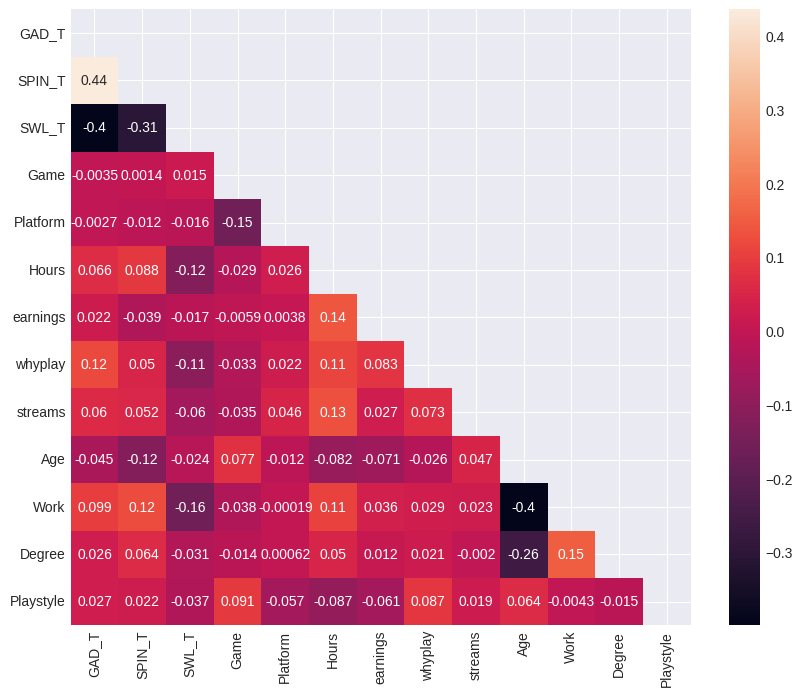

In [353]:
# ПОСТРОИМ НЕСКОЛЬКО КОРЕЛЛЯЦИОННЫХ МАТРИЦ

## №1 - Рассмотрим зависимость между баллами GAD_T(общая тревожность), SPIN_T(социальная тревожность), SWL_T(удовлетворенность жизнью) 
##      и социо-демографическими факторами и игровыми привычками

features = ['GAD_T', 'SPIN_T', 'SWL_T', 'Game', 'Platform', 'Hours', 'earnings', 'whyplay', 'streams', 'Age', 'Work', 'Degree', 'Playstyle']
correlations = df[features].corr(method='spearman')
mask = np.triu(np.ones_like(correlations))

plt.subplots(figsize=(10,8))
sns.heatmap(correlations, annot=True, mask=mask)

#### Можно прийти к выводу, что социо-демографические факторы и игровые привычки почти никак не влияют на уровень общей тревожности среди онлайн-игроков.
#### Ни один из признаков не имеет с признаком GAD_T коэффициента корреляции Спирмена выше 0.12 по модулю
#### Аналогичным образом, у уровня социальной тревожности и уровня удовлетворенности жизнью почти не прослеживается зависимости с привычками онлайн-игроков
#### Ни один из признаков не имеет с признаками SWL_T и SPIN_T коэффициента корреляции Спирмена выше 0.16 и 0.12 по модулю, соответсвенно.
#### Но при этом прослеживается слабая зависимость между самими баллами GAD_T, SPIN_T, SWL_T

<Axes: >

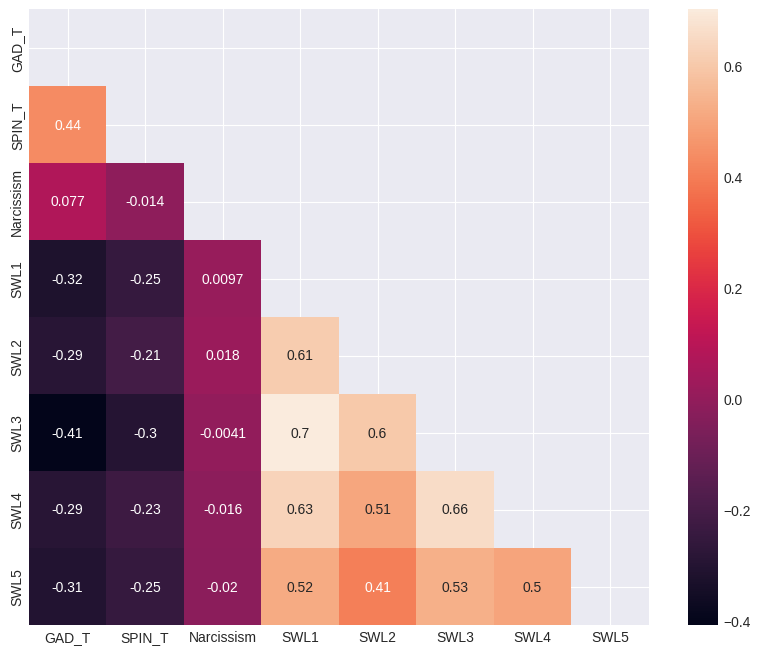

In [355]:
## №2 - Рассмотрим зависимость между финальными баллами GAD_T(общая тревожность), SPIN_T(социальная тревожность)
##      и ответами на опросник SWL о удовлетворенности жизнью 

features = ['GAD_T', 'SPIN_T', 'Narcissism'] + [f'SWL{i}' for i in range(1, 6)]
correlations = df[features].corr(method='spearman')
mask = np.triu(np.ones_like(correlations))

plt.subplots(figsize=(10,8))
sns.heatmap(correlations, annot=True, mask=mask)

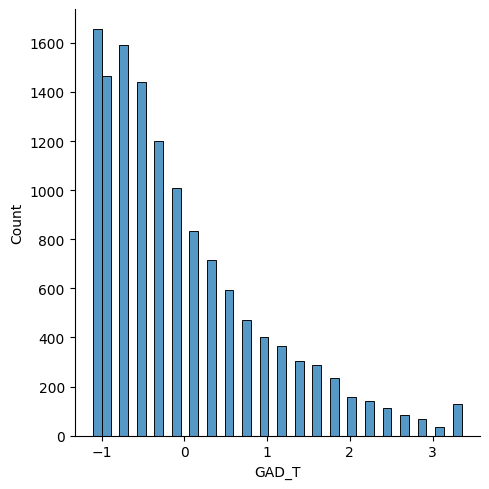

In [246]:
# распределение целевой переменной
sns.displot(df, x="GAD_T")

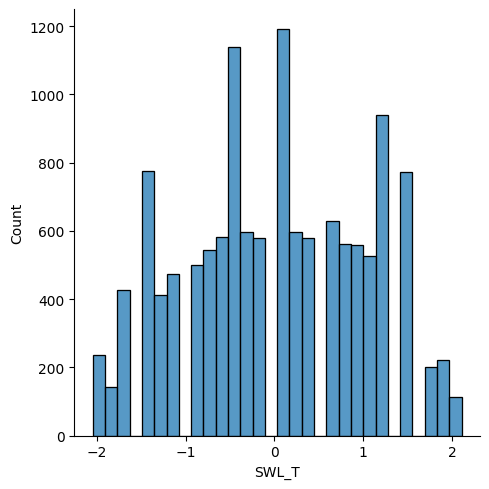

In [247]:
# распределение оценки удовлетворенности жизнью
sns.displot(df, x="SWL_T")

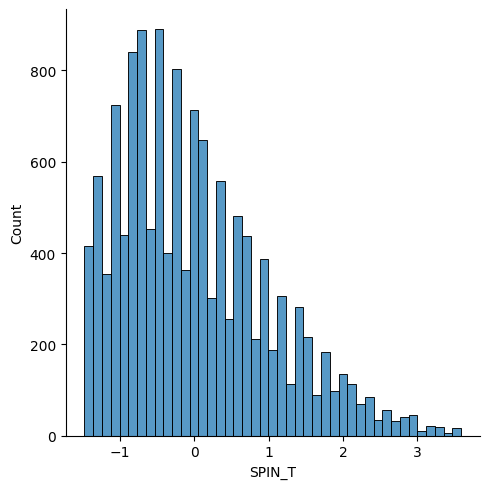

In [248]:
# распределение часов игры
sns.displot(df, x="SPIN_T")

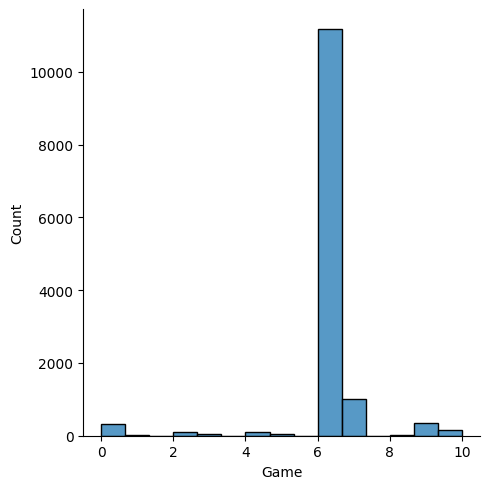

In [249]:
# распределение игр
sns.displot(df, x="Game")

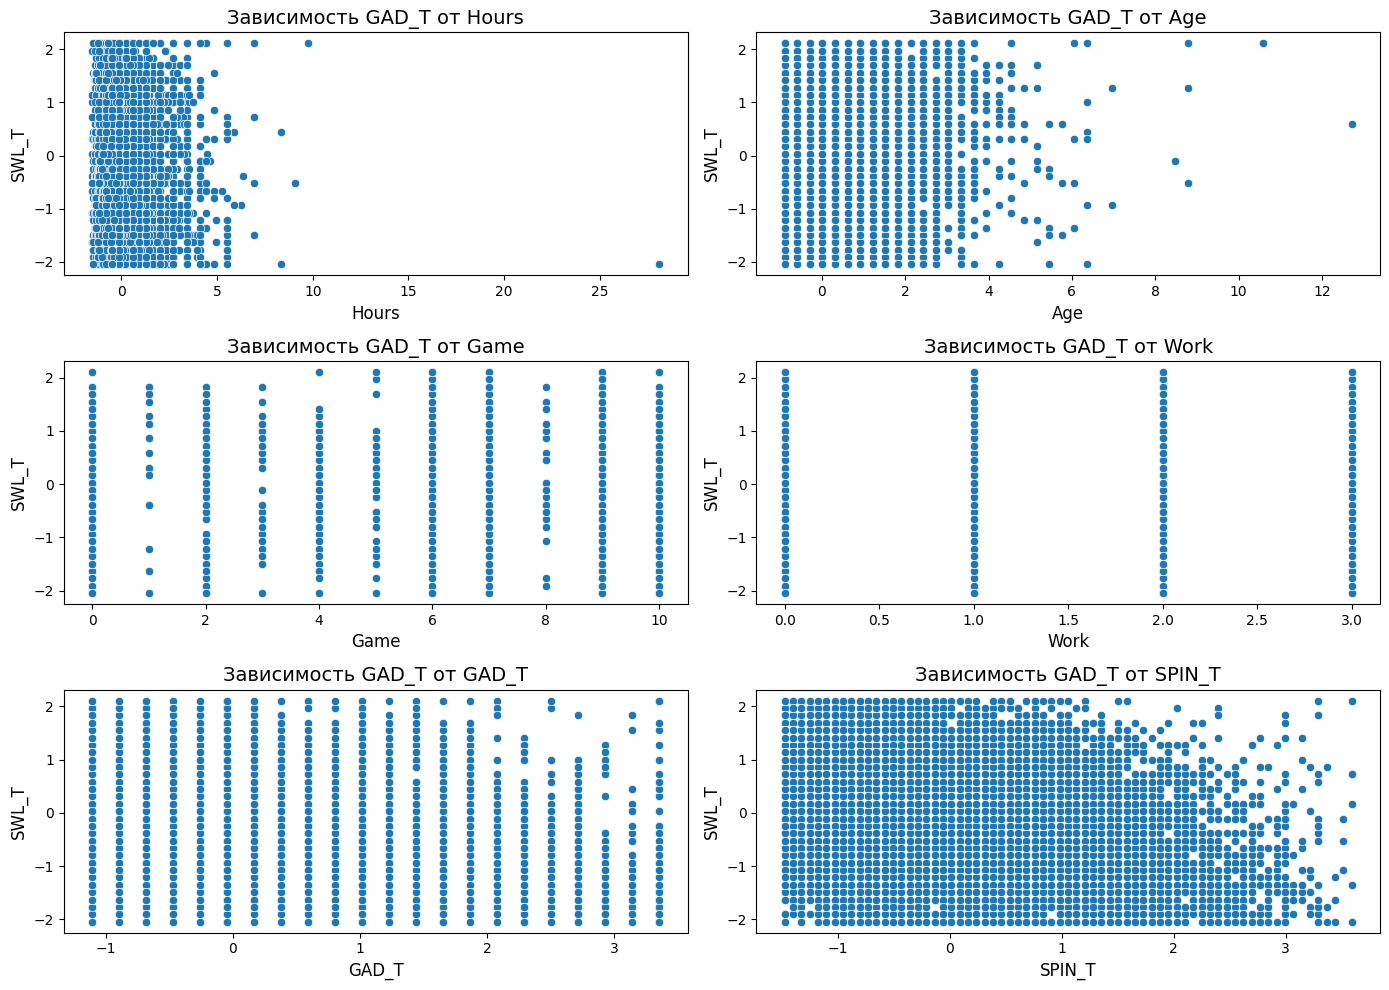

In [253]:
numeric_features = ['Hours', 'Age', 'Game', 'Work', 'GAD_T', 'SPIN_T']

fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.flatten()  

for i, feature in enumerate(numeric_features):
    sns.scatterplot(ax=axes[i], x=df[feature], y=df['SWL_T'])
    axes[i].set_title(f'Зависимость GAD_T от {feature}', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('SWL_T', fontsize=12)

plt.tight_layout()
plt.show()

In [244]:
# нормализуем
from sklearn.preprocessing import StandardScaler

list = ['Hours', 'League', 'Age', 'GAD_T', 'SWL_T', 'SPIN_T']
sc = StandardScaler()
df[list] = sc.fit_transform(df[list])

In [255]:
same = ['GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'GAD_T']
X = df.copy().drop(same, axis=1)
y = df['GAD_T'].copy()

In [257]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [269]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def metrics(y_test, y_pred):
  print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
  print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
  print(f"R2: {r2_score(y_test, y_pred):.2f}\n")

In [270]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
metrics(y_test, y_pred_lr)

MAE: 0.59
MSE: 0.63
R2: 0.38



In [284]:
from sklearn.linear_model import ElasticNet

en = ElasticNet(alpha=0.5)
en.fit(X_train, y_train)
y_pred_en = en.predict(X_test)
metrics(y_test, y_pred_en)

MAE: 0.69
MSE: 0.78
R2: 0.22



In [286]:
from sklearn import svm
sv = svm.SVR(kernel='rbf')
sv.fit(X_train, y_train)
y_pred_sv = sv.predict(X_test)
metrics(y_test, y_pred_en)

MAE: 0.69
MSE: 0.78
R2: 0.22



In [273]:
from sklearn.ensemble import RandomForestRegressor
rnd = RandomForestRegressor()
rnd.fit(X_train, y_train)
y_pred_rnd = rnd.predict(X_test)
metrics(y_test, y_pred_rnd)

MAE: 0.54
MSE: 0.52
R2: 0.49



In [275]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
metrics(y_test, y_pred_gb)

MAE: 0.53
MSE: 0.51
R2: 0.49

